In [1]:
import matplotlib.pyplot as plt
import matplotlib as matplotlib
import seaborn as sns

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
import numpy
import pandas as pd 
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as skmet
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from scipy import stats as st
from scipy.io import arff

In [2]:
iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns=['sepal length', 'sepal width', 'pepal length', 'pepal width'])
df_iris = pd.concat([df_iris, pd.DataFrame(iris.target, columns=['name'])], axis=1 )

In [3]:
dict_attr_wine = {
    0 : 'Alcohol',
    1 : 'Malic acid',
    2 : 'Ash',
    3 : 'Alcalinity of ash' ,
    4 : 'Magnesium',
    5 : 'Total phenols',
    6 : 'Flavanoids',
    7 : 'Nonflavanoid phenols',
    8 : 'Proanthocyanins',
    9 : 'Color intensity',
    10: 'Hue',
    11: 'OD280/OD315 of diluted wines',
    12: 'Proline'
}

wine = datasets.load_wine()
df_wine = pd.DataFrame(wine.data, columns=dict_attr_wine.values())
df_wine = pd.concat([df_wine, pd.DataFrame(wine.target, columns=['name'])], axis=1 )

In [4]:
data1 = arff.loadarff('1year.arff')
data2 = arff.loadarff('2year.arff')
data3 = arff.loadarff('3year.arff')
data4 = arff.loadarff('4year.arff')
data5 = arff.loadarff('5year.arff')
df_bank = pd.DataFrame(data1[0])
df_bank = pd.DataFrame(df_bank.append(pd.DataFrame(data2[0]), ignore_index = True))
df_bank = pd.DataFrame(df_bank.append(pd.DataFrame(data3[0]), ignore_index = True))
df_bank = pd.DataFrame(df_bank.append(pd.DataFrame(data4[0]), ignore_index = True))
df_bank = pd.DataFrame(df_bank.append(pd.DataFrame(data5[0]), ignore_index = True))

df_bank.loc[df_bank['class'] == b'1','class'] = 1
df_bank.loc[df_bank['class'] == b'0','class'] = 0

df_bank['class'] = df_bank['class'].astype('int')

for column in df_bank.iloc[:, :-1]:
    median = df_bank[column].median()
    df_bank = df_bank.fillna(df_bank[column].fillna(median).to_frame())


C:\Users\Daniel\AppData\Local\Temp\ipykernel_20160\890971768.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_bank = pd.DataFrame(df_bank.append(pd.DataFrame(data2[0]), ignore_index = True))
C:\Users\Daniel\AppData\Local\Temp\ipykernel_20160\890971768.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_bank = pd.DataFrame(df_bank.append(pd.DataFrame(data3[0]), ignore_index = True))
C:\Users\Daniel\AppData\Local\Temp\ipykernel_20160\890971768.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_bank = pd.DataFrame(df_bank.append(pd.DataFrame(data4[0]), ignore_index = True))
C:\Users\Daniel\AppData\Local\Temp\ipykernel_20160\890971768.py:10: FutureWarning: The frame.append method is deprecated and will be removed f

In [5]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

def RunKNN (df, n_neighbors = 5, weights = 'uniform', metric = 'minkowski', cv = 3, isStratified = False, print_metrics = True):
    neigh = KNeighborsClassifier(n_neighbors = n_neighbors, metric = metric, weights = weights)

    df_train, df_test = train_test_split( df, test_size=0.33, random_state=42)

    neigh.fit(df_train.iloc[:, :-1], df_train.iloc[:, -1])

    y_true = df_test.iloc[:, -1].tolist()
    y_pred = neigh.predict(df_test.iloc[:, :-1])

    strat_k_fold = None
    if isStratified:
        strat_k_fold = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    else:
        strat_k_fold = KFold(n_splits=cv, shuffle=True, random_state=42)
    
    cross_val = cross_val_score(neigh, df.iloc[:, :-1], df.iloc[:, -1], cv=strat_k_fold)
    cross_val = cross_val.mean()
    
    if print_metrics:
        print(skmet.classification_report(y_true, y_pred))
        print('Cross val: ', cross_val)
    
    return {'f1':skmet.f1_score(y_true, y_pred, average='micro'), 'cross-val': cross_val}

RunKNN(df_iris, cv = 3)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

Cross val:  0.9666666666666667


{'f1': 0.98, 'cross-val': 0.9666666666666667}

# Sprawdzenie liczby sąsiadów (f1-score)

In [6]:
score_metric = 'f1'
neigh_counts = list(range(1, 16))
results_df = pd.DataFrame([
[RunKNN (df_iris, n_neighbors = n, print_metrics = False)[score_metric] for n in neigh_counts],
[RunKNN (df_bank, n_neighbors = n, print_metrics = False)[score_metric] for n in neigh_counts],
[RunKNN (df_wine, n_neighbors = n, print_metrics = False)[score_metric] for n in neigh_counts]
], index=['IRIS', 'PBC', 'WINE'], columns=neigh_counts)

results_df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
IRIS,0.980000,0.980000,0.980000,0.980000,0.980000,0.980000,0.980000,0.980000,0.980000,0.980000,1.000000,1.000000,1.000000,1.000000,1.000000
PBC,0.909313,0.946244,0.940170,0.948408,0.946803,0.949455,0.948548,0.949735,0.949386,0.949665,0.949455,0.949665,0.949595,0.949665,0.949665
WINE,0.779661,0.694915,0.694915,0.644068,0.677966,0.677966,0.711864,0.677966,0.677966,0.694915,0.728814,0.745763,0.745763,0.728814,0.728814


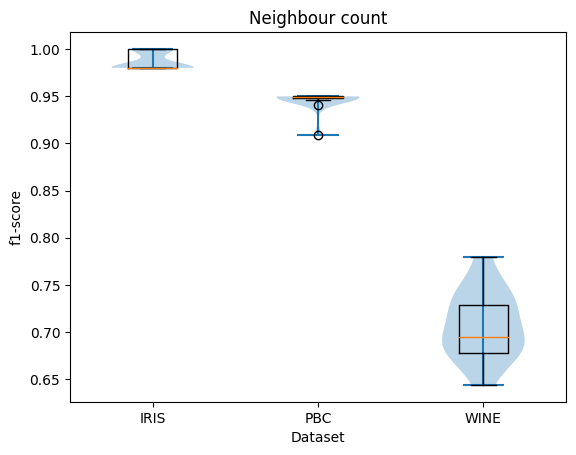

In [7]:
plt.close()
plt.violinplot(results_df.transpose() )
plt.boxplot(results_df.transpose())

plt.title('Neighbour count')

plt.xticks([1,2,3], ['IRIS', 'PBC', 'WINE'])

plt.xlabel('Dataset')
plt.ylabel('f1-score')

plt.show()

# Sprawdzenie metod głosowania (f1-score)

In [8]:
# weight function is used to judge and interpret the distances during the training process
def my_weight(weights):
    weights = [w / max(w) for w in weights]
    return numpy.exp(weights)

score_metric = 'f1'
weights = ['uniform', 'distance', my_weight]

results_df = pd.DataFrame([
[RunKNN (df_iris, weights = w, print_metrics = False)[score_metric] for w in weights],
[RunKNN (df_bank, weights = w, print_metrics = False)[score_metric] for w in weights],
[RunKNN (df_wine, weights = w, print_metrics = False)[score_metric] for w in weights]
], index=['IRIS','PBC', 'WINE'], columns=['uniform', 'distance', 'my_weight'])

results_df


,uniform,distance,my_weight
IRIS,0.980000,0.980000,0.980000
PBC,0.946803,0.940519,0.946593
WINE,0.677966,0.711864,0.677966


<Axes: >

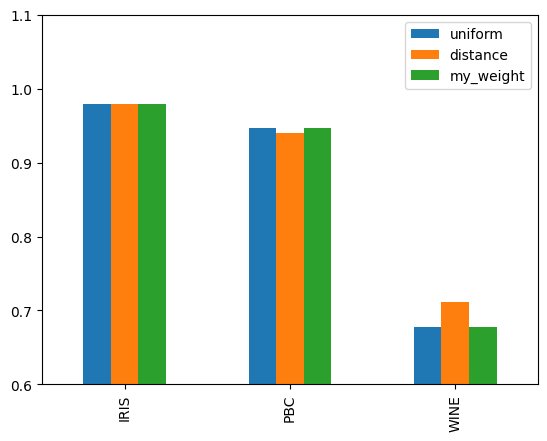

In [9]:
results_df.plot(kind="bar", ylim = (0.6, 1.1))

# Sprawdzenie metryk (f1-score)

In [10]:
score_metric = 'f1'
metrics = ['minkowski', 'euclidean', 'chebyshev']

results_df = pd.DataFrame([
[RunKNN (df_iris, metric= m, print_metrics = False)[score_metric] for m in metrics],
[RunKNN (df_bank, metric= m, print_metrics = False)[score_metric] for m in metrics],
[RunKNN (df_wine, metric= m, print_metrics = False)[score_metric] for m in metrics]
], index=['IRIS','PBC', 'WINE'], columns=metrics)
results_df

,minkowski,euclidean,chebyshev
IRIS,0.980000,0.980000,0.980000
PBC,0.946803,0.946803,0.947082
WINE,0.677966,0.677966,0.694915


<Axes: >

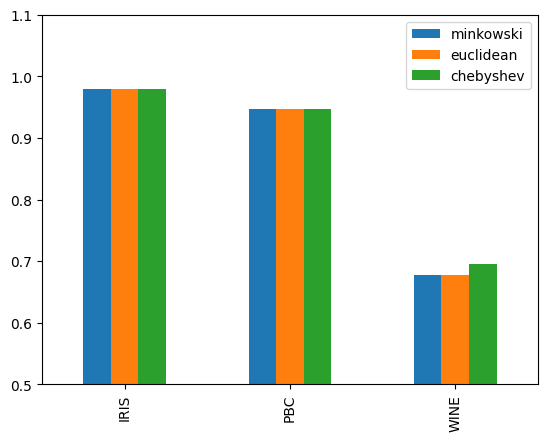

In [11]:
results_df.plot(kind="bar", ylim = (0.5, 1.1))

# Badanie skuteczności według walidacji krzyżowej z różnymi parametrami

In [12]:
score_metric = 'cross-val'
cvs = list(range(2, 11))

print('Iris')
results_df = pd.DataFrame([
[RunKNN (df_iris, isStratified = True, cv= c, print_metrics = False)[score_metric] for c in cvs],
[RunKNN (df_iris, isStratified = False, cv= c, print_metrics = False)[score_metric] for c in cvs]
], index=['Stratified','Not stratified'], columns=cvs)
results_df

Iris


,2,3,4,5,6,7,8,9,10
Stratified,0.940000,0.953333,0.959815,0.966667,0.960000,0.973098,0.953216,0.953431,0.953333
Not stratified,0.946667,0.966667,0.966394,0.973333,0.973333,0.966296,0.973319,0.973039,0.973333


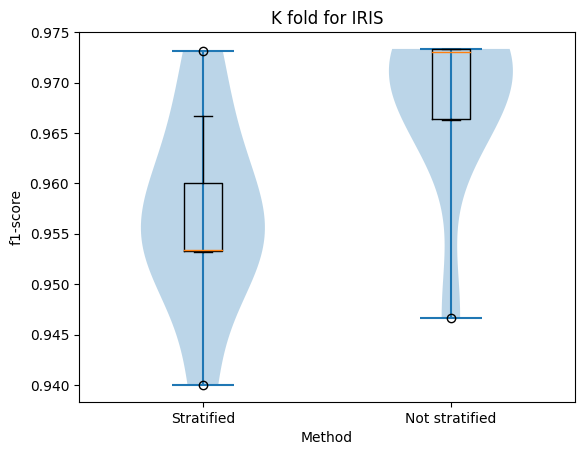

In [13]:
plt.close()
plt.violinplot(results_df.transpose() )
plt.boxplot(results_df.transpose())

plt.title('K fold for IRIS')

plt.xticks([1,2], ['Stratified','Not stratified'])

plt.xlabel('Method')
plt.ylabel('f1-score')

plt.show()

In [14]:
score_metric = 'cross-val'
cvs = list(range(2, 11))

print('PCB')
results_df = pd.DataFrame([
[RunKNN (df_bank, isStratified = True, cv= c, print_metrics = False)[score_metric] for c in cvs],
[RunKNN (df_bank, isStratified = False, cv= c, print_metrics = False)[score_metric] for c in cvs]
], index=['Stratified','Not stratified'], columns=cvs)

results_df

PCB


,2,3,4,5,6,7,8,9,10
Stratified,0.948508,0.948716,0.948439,0.948531,0.949038,0.948670,0.948785,0.948716,0.948531
Not stratified,0.948854,0.948992,0.948693,0.949107,0.948923,0.948992,0.948946,0.948946,0.948692


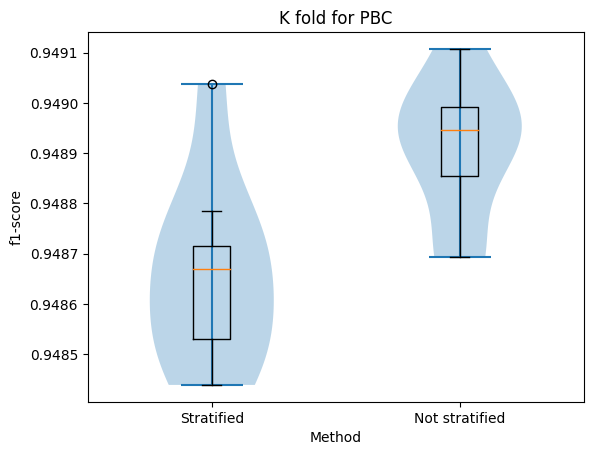

In [15]:
plt.close()
plt.violinplot(results_df.transpose() )
plt.boxplot(results_df.transpose())

plt.title('K fold for PBC')

plt.xticks([1,2], ['Stratified','Not stratified'])

plt.xlabel('Method')
plt.ylabel('f1-score')

plt.show()

In [16]:
score_metric = 'cross-val'
cvs = list(range(2, 11))

print('Wine')
results_df = pd.DataFrame([
[RunKNN (df_wine, isStratified = True, cv= c, print_metrics = False)[score_metric] for c in cvs],
[RunKNN (df_wine, isStratified = False, cv= c, print_metrics = False)[score_metric] for c in cvs]
], index=['Stratified','Not stratified'], columns=cvs)

results_df

Wine


,2,3,4,5,6,7,8,9,10
Stratified,0.730337,0.679473,0.696843,0.680159,0.685057,0.708132,0.701828,0.685088,0.685621
Not stratified,0.634831,0.640207,0.668308,0.674603,0.662644,0.662418,0.662549,0.640936,0.664052


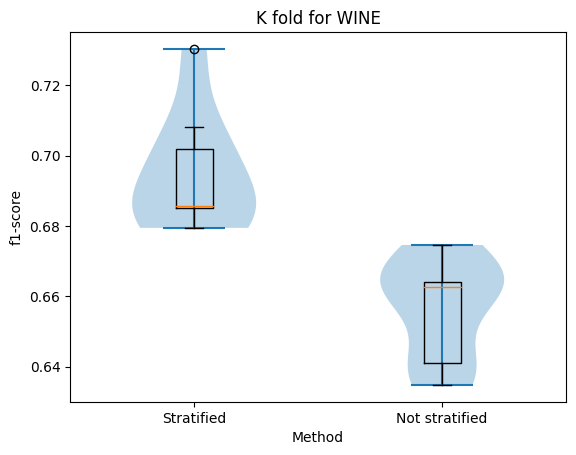

In [17]:
plt.close()
plt.violinplot(results_df.transpose() )
plt.boxplot(results_df.transpose())

plt.title('K fold for WINE')

plt.xticks([1,2], ['Stratified','Not stratified'])

plt.xlabel('Method')
plt.ylabel('f1-score')

plt.show()

In [18]:
score_metric = 'cross-val'
strs = [True, False]

results_df = pd.DataFrame([
[RunKNN (df_iris, isStratified= s, print_metrics = False)[score_metric] for s in strs],
[RunKNN (df_bank, isStratified= s, print_metrics = False)[score_metric] for s in strs],
[RunKNN (df_wine, isStratified= s, print_metrics = False)[score_metric] for s in strs]
], index=['IRIS','PBC', 'WINE'], columns=['Stratified','Not Stratified'])

results_df

,Stratified,Not Stratified
IRIS,0.953333,0.966667
PBC,0.948716,0.948992
WINE,0.679473,0.640207


<Axes: >

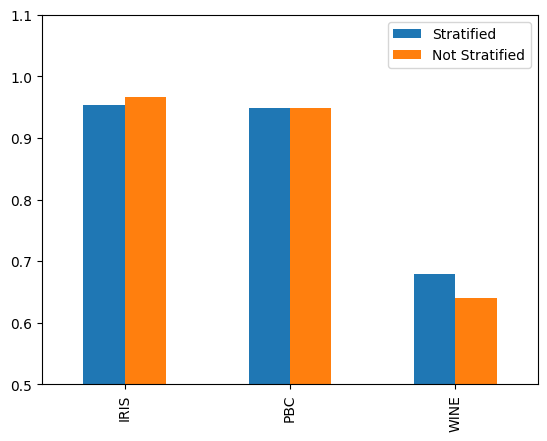

In [19]:
results_df.plot(kind="bar", ylim = (0.5, 1.1))